learn from blog from https://gdmarmerola.github.io/ and make some changes

In [ ]:
##import part
import pandas as pd
import numpy as np
import random
from tqdm import tqdm
import matplotlib.pyplot as plt

# setting seeds
# random.seed(42)
# np.random.seed(42)

In [55]:
## env
class MAB:
    def __init__(self,bandit_p):
        self.bandit_p=bandit_p
    
    def play(self,k):
        return np.random.binomial(1,self.bandit_p[k]),  np.max(self.bandit_p)-self.bandit_p[k]

In [56]:
## three different bandits
bandit_probility=[0.6,0.7]
num_bandit=len(bandit_probility)

time_play=1000

cum_reward0,cum_reward1=0,0
cum_reward_list_random0=[]
cum_reward_list_random1=[]
env=MAB(bandit_probility)

## random policy

In [57]:
cum_reward_list_random0.clear()
cum_reward_list_random1.clear()

for i in tqdm(range(time_play)):
    ##choose bandit to play
    n_th=np.random.choice(num_bandit,1)[0]
    reward,regret=env.play(n_th)

    if n_th==0:
        cum_reward0+=reward
        cum_reward_list_random0.append(cum_reward0)
        
    else:
        cum_reward1+=reward
        cum_reward_list_random1.append(cum_reward1)

100%|██████████| 1000/1000 [00:00<00:00, 25953.73it/s]


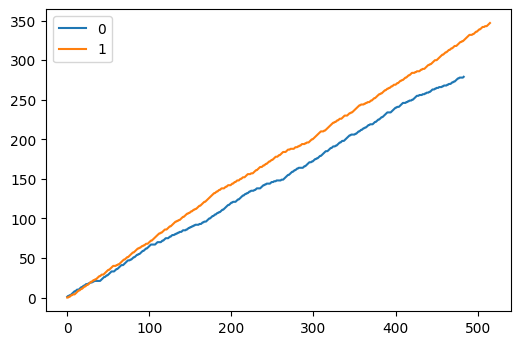

In [58]:
plt.figure(dpi=100)
plt.plot(cum_reward_list_random0,label='0')
plt.plot(cum_reward_list_random1,label='1')
plt.legend()
plt.show()

In [59]:
def random_policy(k_array, reward_array, n_bandits):
    return np.random.choice(range(n_bandits),1)[0]

## there is an issue that how to init can have huge affect to result
solu 

In [60]:
class eGreedyPolicy:
    def __init__(self,epsilon):
        self.epsilon=epsilon
    
    def choose_bandit(self,time_play_array,reward_array,num_bandit):
        average_reward_array=reward_array/time_play_array
        # print(average_reward_array)
        if np.random.random()<self.epsilon:
            ## not the best policy
            return np.random.choice(np.delete(list(range(num_bandit)),np.argmax(average_reward_array)))
        else:
            ## best policy
            return np.argmax(average_reward_array)

In [61]:
counter0,counter1=0,0
cum_reward0,cum_reward1=0,0
cum_reward_list_random0.clear()
cum_reward_list_random1.clear()
epsilon=0.05

for i in tqdm(range(time_play)):
    ##choose bandit policy to play
    time_play_array=np.array([counter0,counter1])
    reward_array=np.array([cum_reward0,cum_reward1])
    policy=eGreedyPolicy(epsilon)
    n_th=policy.choose_bandit(time_play_array,reward_array,num_bandit)
    reward,regret=env.play(n_th)

    if n_th==0:
        counter0+=1
        cum_reward0+=reward
        cum_reward_list_random0.append(cum_reward0)
        
    else:
        counter1+=1
        cum_reward1+=reward
        cum_reward_list_random1.append(cum_reward1)


  0%|          | 0/1000 [00:00<?, ?it/s]/tmp/ipykernel_5380/1690455284.py:6: RuntimeWarning: invalid value encountered in true_divide
  average_reward_array=reward_array/time_play_array
100%|██████████| 1000/1000 [00:00<00:00, 30816.23it/s]


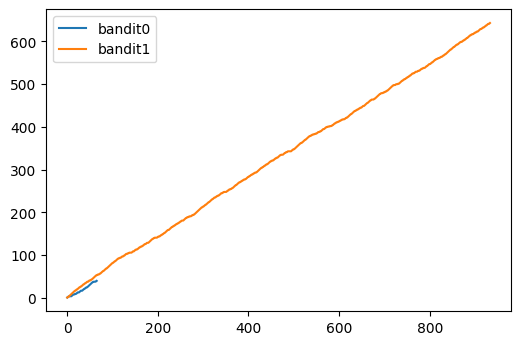

In [62]:
plt.figure(dpi=100)
plt.plot(cum_reward_list_random0,label='bandit0')
plt.plot(cum_reward_list_random1,label='bandit1')
plt.legend()
plt.show()

In [63]:
class ThompsonSampling:
    def __init__(self):
        pass

    def choose_bandit(self,time_play_array,reward_array,num_bandit):
        sample_list=[]
        success=reward_array
        fail=time_play_array-success
        for band in range(num_bandit):
            sample_list=[np.random.beta(1+success[band],1+fail[band]) for band in range (num_bandit)]
        return np.argmax(sample_list)
        

In [70]:
counter0,counter1=0,0
cum_reward0,cum_reward1=0,0
cum_reward_list_random0.clear()
cum_reward_list_random1.clear()
epsilon=0.05

for i in tqdm(range(time_play)):
    ##choose bandit policy to play
    time_play_array=np.array([counter0,counter1])
    reward_array=np.array([cum_reward0,cum_reward1])
    policy=ThompsonSampling()
    n_th=policy.choose_bandit(time_play_array,reward_array,num_bandit)
    reward,regret=env.play(n_th)

    if n_th==0:
        counter0+=1
        cum_reward0+=reward
        cum_reward_list_random0.append(cum_reward0)
        
    else:
        counter1+=1
        cum_reward1+=reward
        cum_reward_list_random1.append(cum_reward1)

100%|██████████| 1000/1000 [00:00<00:00, 26103.14it/s]


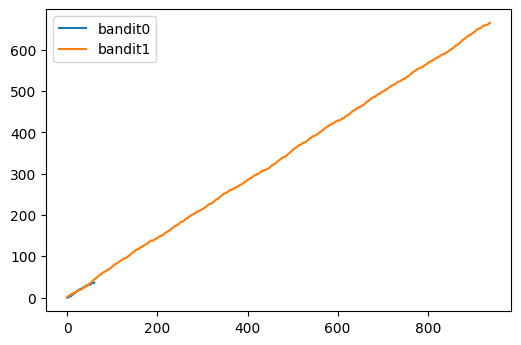

In [71]:
plt.figure(dpi=100)
plt.plot(cum_reward_list_random0,label='bandit0')
plt.plot(cum_reward_list_random1,label='bandit1')
plt.legend()
plt.show()